In [12]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# LABELS = ['square', 'circle', 'cyan', 'red', 'yellow', 'green']
LABELS = ['square', 'circle', 'triangle', 'pentagon', 'cyan', 'red', 'yellow', 'green']
SHAPES = ['square', 'circle', 'triangle', 'pentagon']
COLORS = [(0, 192, 192),
          (255, 0, 0),
          (255, 255, 0),
          (0, 255, 0)
          ]

def draw_shape(color_id, shape_id, draw, img_size, start_pos):
    if shape_id == 0:
        draw.rectangle((start_pos, start_pos,
                        img_size[0]-(start_pos+1), img_size[1]-(start_pos+1)),
                       fill=COLORS[color_id])
    elif shape_id == 1:
        draw.ellipse((start_pos, start_pos,
                      img_size[0]-(start_pos+1), img_size[1]-(start_pos+1)),
                     fill=COLORS[color_id])
    elif shape_id == 2:
        draw.polygon([(start_pos, img_size[0]-(start_pos+1)),
                      (int(img_size[1]/2), start_pos),
                      (img_size[0]-(start_pos+1), img_size[1]-(start_pos+1))],
                     fill=COLORS[color_id])
    elif shape_id == 3:
        draw.polygon([(int(1/3*img_size[0]), img_size[1]-(start_pos+1)),
                      (start_pos, int(4/9*img_size[1])),
                      (int(img_size[0]/2), start_pos),
                      (img_size[0]-(start_pos+1), int(4/9*img_size[1])),
                      (int(2/3*img_size[0]), img_size[1]-(start_pos+1))],
                     fill=COLORS[color_id])


def gen_dataset(num_samples, img_size=(28, 28), start_pos=8):
    
    num_shapes = len(SHAPES)
    num_colors = len(COLORS)

    dataset = []
    labels = []
    for i in range(num_samples):

        # choose random color 
        color_id = np.random.randint(0, num_colors)
        # randomly select a shape (either square or circle)
        shape_id = np.random.randint(0, num_shapes)
        # create object
        im1 = Image.new('RGB', img_size, (128, 128, 128))
        draw = ImageDraw.Draw(im1)
        draw_shape(color_id, shape_id, draw, img_size, start_pos)

        label1 = np.zeros(num_shapes + num_colors)
        label1[0:num_shapes][shape_id] = 1.
        label1[num_shapes:][color_id] = 1.

        # pair both images and labels of these
        labels.append(label1)
        dataset.append(np.array(im1))
    
    return np.array(dataset), np.array(labels)

### Same color different shape

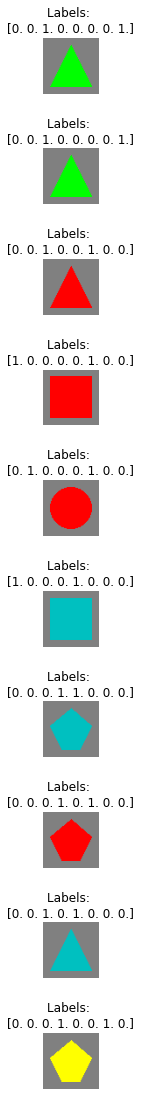

In [13]:
num_train_samples = 10000
num_val_samples = 1000

train_data, train_labels = gen_dataset(num_train_samples, img_size=(64, 64), start_pos=8)
val_data, val_labels = gen_dataset(num_val_samples, img_size=(64, 64), start_pos=8)

fig, axs = plt.subplots(10, 1, figsize=(1,20))
for idx in range(10):
    axs[idx].imshow(train_data[idx])
    axs[idx].set_title(f"Labels: \n{train_labels[idx]}")
    axs[idx].axis('off')
plt.show()

np.save("../Data/train_toydata_color_shape.npy", train_data)
np.save("../Data/train_toydata_color_shape_labels.npy", train_labels)